In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

plt.style.use('ggplot')

In [2]:
#read in data
df = pd.read_csv("archive/Reviews.csv")

In [3]:
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df = df.head(500)

In [6]:
df.shape

(500, 10)

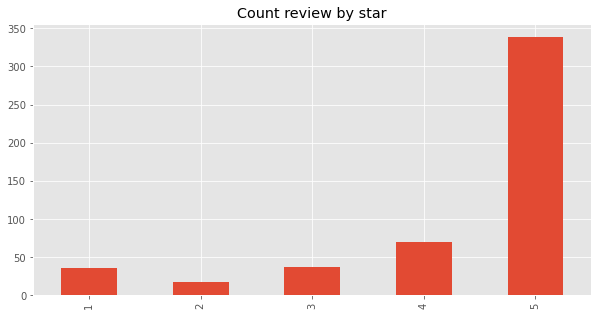

In [7]:
#QUICK  EDA
ax = df['Score'].value_counts().sort_index().plot(kind='bar', title='Count review by star', figsize = (10,5))
plt.show()

In [8]:
## basic nltk 
example = df['Text'][55]
print(example)

We roast these in a large cast iron pan on the grill (about 1/3 of the bag at a time).  The smell is wonderful and the roasted beans taste delicious too.  More importantly, the coffee is smooth; no bitter aftertaste.  On numerous occasions, we've had to send the roasted beans home with friends because they like it so much.


In [9]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['We', 'roast', 'these', 'in', 'a', 'large', 'cast', 'iron', 'pan', 'on']

In [10]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('We', 'PRP'),
 ('roast', 'VBP'),
 ('these', 'DT'),
 ('in', 'IN'),
 ('a', 'DT'),
 ('large', 'JJ'),
 ('cast', 'NN'),
 ('iron', 'NN'),
 ('pan', 'NN'),
 ('on', 'IN')]

In [11]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  We/PRP
  roast/VBP
  these/DT
  in/IN
  a/DT
  large/JJ
  cast/NN
  iron/NN
  pan/NN
  on/IN
  the/DT
  grill/NN
  (/(
  about/IN
  1/3/CD
  of/IN
  the/DT
  bag/NN
  at/IN
  a/DT
  time/NN
  )/)
  ./.
  The/DT
  smell/NN
  is/VBZ
  wonderful/JJ
  and/CC
  the/DT
  roasted/JJ
  beans/NNS
  taste/VBP
  delicious/JJ
  too/RB
  ./.
  More/RBR
  importantly/RB
  ,/,
  the/DT
  coffee/NN
  is/VBZ
  smooth/JJ
  ;/:
  no/DT
  bitter/JJ
  aftertaste/NN
  ./.
  On/IN
  numerous/JJ
  occasions/NNS
  ,/,
  we/PRP
  've/VBP
  had/VBN
  to/TO
  send/VB
  the/DT
  roasted/JJ
  beans/NNS
  home/NN
  with/IN
  friends/NNS
  because/IN
  they/PRP
  like/VBP
  it/PRP
  so/RB
  much/RB
  ./.)


In [12]:
#Sentiment analysis using VADER

In [13]:
#bag of words approach 

In [14]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [15]:
sia = SentimentIntensityAnalyzer()

In [16]:
sia

In [17]:
sia.polarity_scores(' I am happy')

{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}

In [18]:
sia.polarity_scores("its the worst")

{'neg': 0.672, 'neu': 0.328, 'pos': 0.0, 'compound': -0.6249}

In [19]:
print(example)
sia.polarity_scores(example)

We roast these in a large cast iron pan on the grill (about 1/3 of the bag at a time).  The smell is wonderful and the roasted beans taste delicious too.  More importantly, the coffee is smooth; no bitter aftertaste.  On numerous occasions, we've had to send the roasted beans home with friends because they like it so much.


{'neg': 0.071, 'neu': 0.708, 'pos': 0.221, 'compound': 0.8908}

In [43]:
# run polarity score on entire dataset using loops
res={}
for i,row in tqdm(df.iterrows(),total = len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)
   


  0%|          | 0/500 [00:00<?, ?it/s]

In [21]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [22]:
vaders = pd.DataFrame(res).T# T flips everything horizontally
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders = vaders.merge(df, how='left')

In [23]:
# we have sentiment scores and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


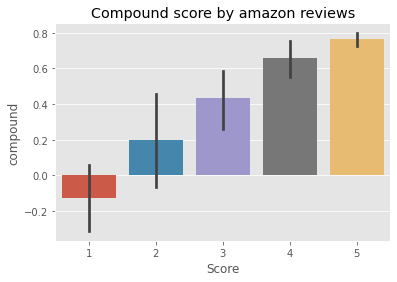

In [24]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound score by amazon reviews')
plt.show()

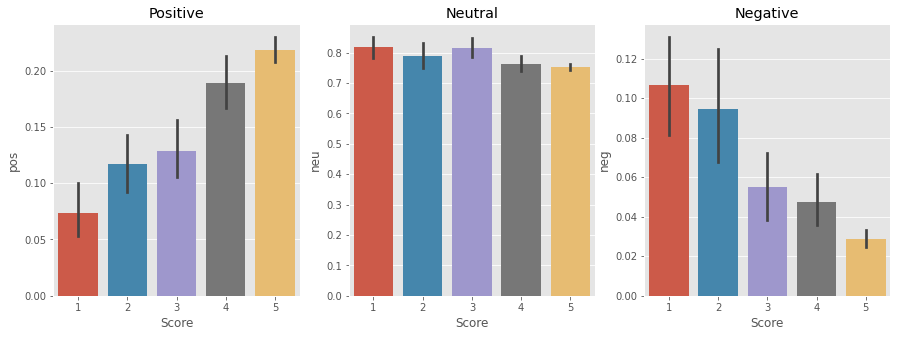

In [25]:
fig,axs = plt.subplots(1,3,figsize=(15,5))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()

In [26]:
# Roberta Pretrained Model
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [27]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\USER\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [29]:
#Vader results on example
print(example)
sia.polarity_scores(example)

We roast these in a large cast iron pan on the grill (about 1/3 of the bag at a time).  The smell is wonderful and the roasted beans taste delicious too.  More importantly, the coffee is smooth; no bitter aftertaste.  On numerous occasions, we've had to send the roasted beans home with friends because they like it so much.


{'neg': 0.071, 'neu': 0.708, 'pos': 0.221, 'compound': 0.8908}

In [34]:
#run one vader example for roberta model
encoded_text = tokenizer(example, return_tensors = 'pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()# converting it into numpy
scores = softmax(scores)
scores

array([0.00180009, 0.01893233, 0.9792676 ], dtype=float32)

In [36]:
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]

}
print(scores_dict)

{'roberta_neg': 0.0018000916, 'roberta_neu': 0.018932331, 'roberta_pos': 0.9792676}


In [39]:
# run this for entire dataset

def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors = 'pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()# converting it into numpy
    scores = softmax(scores)
    scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]

    }
    return scores_dict


In [45]:
res={}
for i,row in tqdm(df.iterrows(),total = len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)

        vader_result_rename = {}
        for key,value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value

        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename,**roberta_result}
        res[myid] = both
        
    except RuntimeError:
        print(f'broke for id{myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

broke for id83
broke for id187


In [46]:
result_df = pd.DataFrame(res).T# T flips everything horizontally
result_df = result_df.reset_index().rename(columns={'index':'Id'})
result_df = result_df.merge(df, how='left')

In [47]:
result_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [49]:
result_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


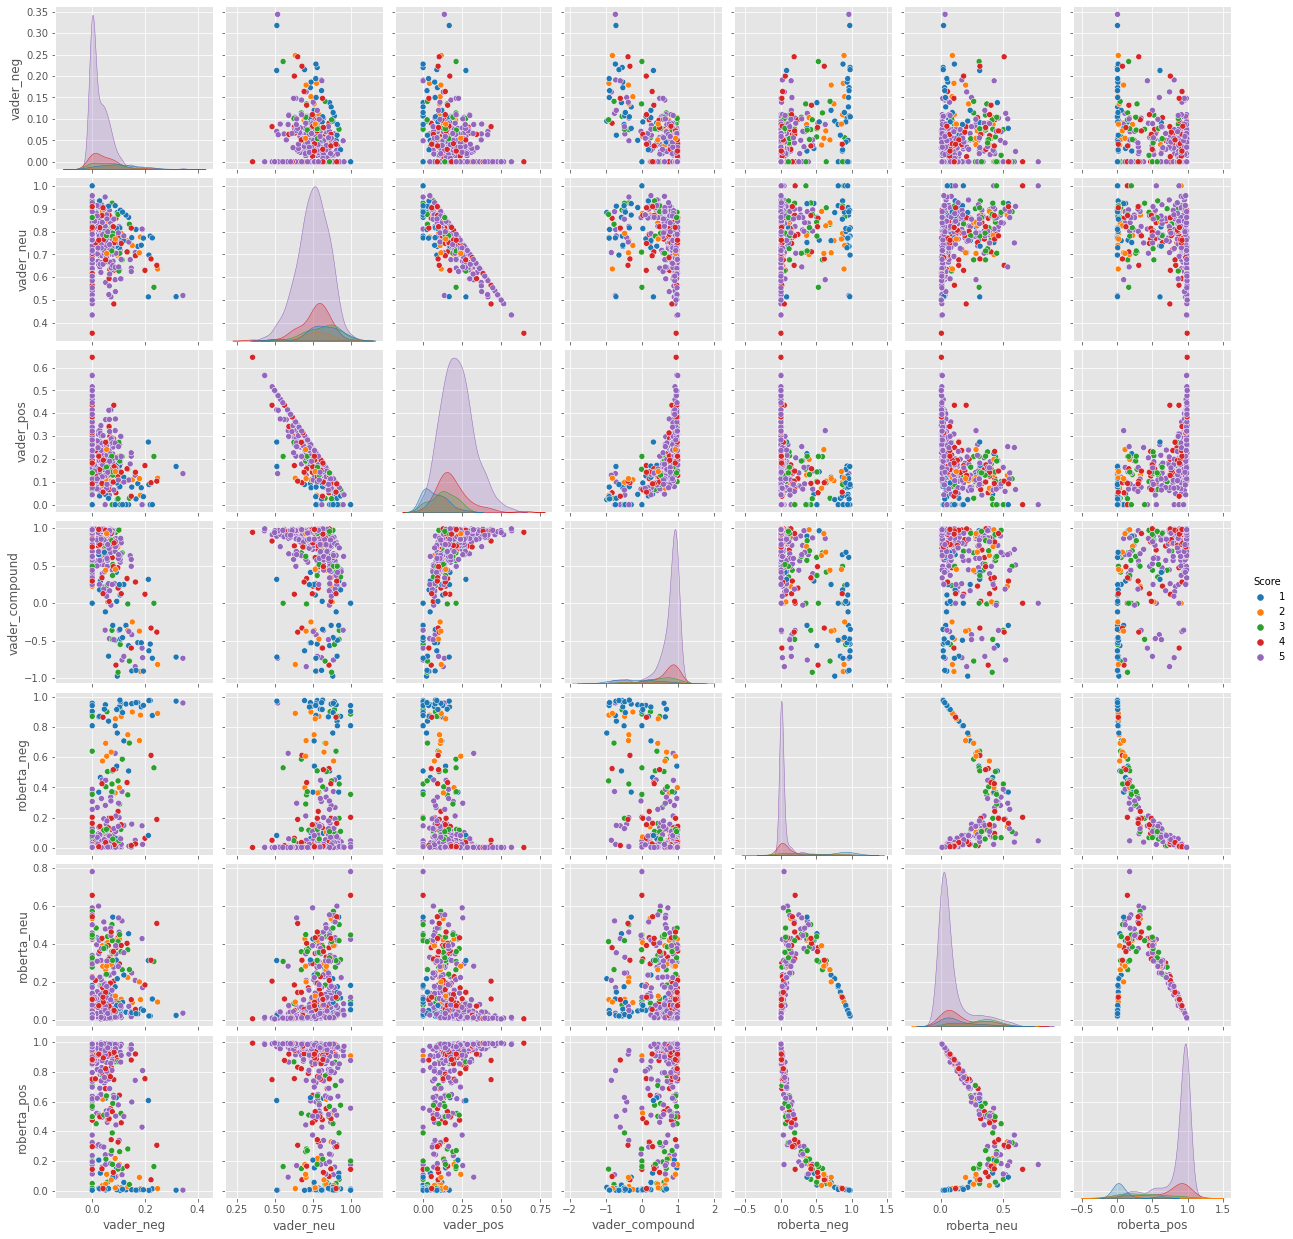

In [51]:
## compare scores between models
sns.pairplot(data=result_df,
             vars= ['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
                   'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue='Score',
             palette='tab10'
            )
plt.show()

In [53]:
# review some examples
result_df.query('Score==1').sort_values('roberta_pos', ascending = False).values[0]

array([255, 0.091, 0.736, 0.172, 0.4118, 0.05961427092552185,
       0.3147493004798889, 0.6256364583969116, 'B0048IC328',
       'A1W867A8DSHFHC', 'no name', 1, 3, 1, 1339804800,
       "Don't Waste Your Money",
       'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'],
      dtype=object)

In [54]:
result_df.query('Score==1').sort_values('vader_pos', ascending = False).values[0] # model doesnt pick up sarcasm

array([325, 0.213, 0.514, 0.274, 0.3185, 0.08101806044578552,
       0.31180262565612793, 0.6071793437004089, 'B000JEHAHS',
       'A2CU16YU1KEOUY', 'Hurricane Ridge "Chris"', 5, 19, 1, 1168300800,
       'Never Arrived',
       'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'],
      dtype=object)

In [55]:
#negative sentiment 5 star review
result_df.query('Score==5').sort_values('roberta_neg', ascending = False).values[0]

array([70, 0.344, 0.52, 0.136, -0.7345, 0.9601579308509827,
       0.03542911633849144, 0.004412972368299961, 'B000E7VI7S',
       'AWCBF2ZWIN57F', 'C. Salcido', 0, 2, 5, 1185753600,
       'pretzel haven!',
       'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'],
      dtype=object)

In [56]:
result_df.query('Score==5').sort_values('vader_pos', ascending = False).values[0]

array([182, 0.0, 0.433, 0.567, 0.9667, 0.001888565719127655,
       0.007512769196182489, 0.9905986189842224, 'B005CJVVJ8',
       'A3F44FUPG97AA9', 'Monie', 1, 1, 5, 1339545600,
       "Marley's Mellow Mood Lite - Half Tea Half Lemonade",
       'This is an great product. The taste is great, and it works exactly as described. Superb natural sleep aid. AMAZING!'],
      dtype=object)

In [57]:
#quick way to run sentiment analysis
from transformers import pipeline

In [58]:
sent_pipeline =  pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [59]:
sent_pipeline('I cant wake up')

[{'label': 'NEGATIVE', 'score': 0.9250167608261108}]

In [60]:
sent_pipeline("good work here")

[{'label': 'POSITIVE', 'score': 0.9998435974121094}]